<a href="https://colab.research.google.com/github/lflorian/HeartAttack/blob/master/Preparing_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install missingno

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#load Dataset
dataset = pd.read_csv(r'/content/drive/My Drive/echocardiogram.csv') 

In [34]:
print(dataset)

     survival  still_alive  age_at_heart_attack  ...  name  group  Alive_at_1
0        11.0          0.0                 71.0  ...  name    1.0         0.0
1        19.0          0.0                 72.0  ...  name    1.0         0.0
2        16.0          0.0                 55.0  ...  name    1.0         0.0
3        57.0          0.0                 60.0  ...  name    1.0         0.0
4        19.0          1.0                 57.0  ...  name    1.0         0.0
..        ...          ...                  ...  ...   ...    ...         ...
127       7.5          1.0                 64.0  ...  name    NaN         NaN
128      41.0          0.0                 64.0  ...  name    NaN         NaN
129      36.0          0.0                 69.0  ...  name    NaN         NaN
130      22.0          0.0                 57.0  ...  name    NaN         NaN
131      20.0          0.0                 62.0  ...  name    NaN         NaN

[132 rows x 13 columns]


In [0]:
#remove non important columns
del dataset["name"]
del dataset["group"]
del dataset["mult"]

In [36]:
#show missing values
print(dataset.isnull().sum())
print(dataset.shape)

survival                  2
still_alive               1
age_at_heart_attack       5
pericardial_effusion      1
fractional_shortening     8
epss                     15
lvdd                     11
Wall_motion_score         4
Wall_motion_index         1
Alive_at_1               58
dtype: int64
(132, 10)


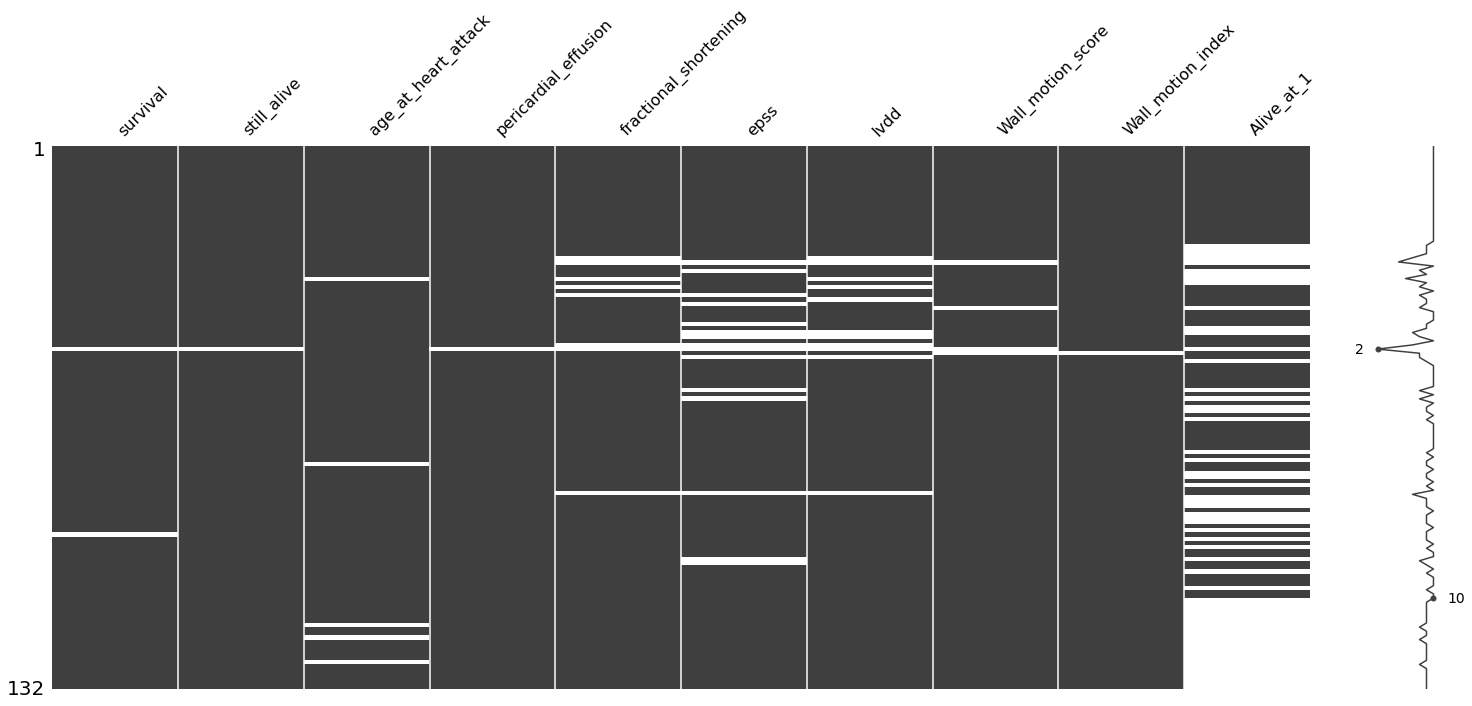

In [37]:
#show missing values
msno.matrix(dataset)

In [38]:
from fancyimpute import KNN
dataset_knn=KNN(k=2).fit_transform(dataset)


Imputing row 1/132 with 0 missing, elapsed time: 0.014
Imputing row 101/132 with 2 missing, elapsed time: 0.017


In [39]:
print(dataset_knn)

[[11.     0.    71.    ... 14.     1.     0.   ]
 [19.     0.    72.    ... 14.     1.7    0.   ]
 [16.     0.    55.    ... 14.     1.     0.   ]
 ...
 [36.     0.    69.    ... 14.5    1.21   0.   ]
 [22.     0.    57.    ... 15.     1.36   0.   ]
 [20.     0.    62.    ... 15.5    1.409  0.   ]]


In [40]:
dataset_knn=pd.DataFrame(dataset_knn)
dataset_knn.columns=dataset.columns
dataset_knn.Alive_at_1 = dataset_knn.Alive_at_1.round()
#dataset_knn.loc[dataset_knn['Alive_at_1'] > 1, 'Alive_at_1'] = 1
print(dataset_knn)

     survival  still_alive  ...  Wall_motion_index  Alive_at_1
0        11.0          0.0  ...              1.000         0.0
1        19.0          0.0  ...              1.700         0.0
2        16.0          0.0  ...              1.000         0.0
3        57.0          0.0  ...              1.450         0.0
4        19.0          1.0  ...              2.250         0.0
..        ...          ...  ...                ...         ...
127       7.5          1.0  ...              1.000         0.0
128      41.0          0.0  ...              1.100         0.0
129      36.0          0.0  ...              1.210         0.0
130      22.0          0.0  ...              1.360         0.0
131      20.0          0.0  ...              1.409         0.0

[132 rows x 10 columns]


In [41]:
#show missing values
print(dataset_knn.isnull().sum())
print(dataset_knn.shape)
#dataset_knn.to_csv(r'/content/drive/My Drive/knn.csv')

survival                 0
still_alive              0
age_at_heart_attack      0
pericardial_effusion     0
fractional_shortening    0
epss                     0
lvdd                     0
Wall_motion_score        0
Wall_motion_index        0
Alive_at_1               0
dtype: int64
(132, 10)


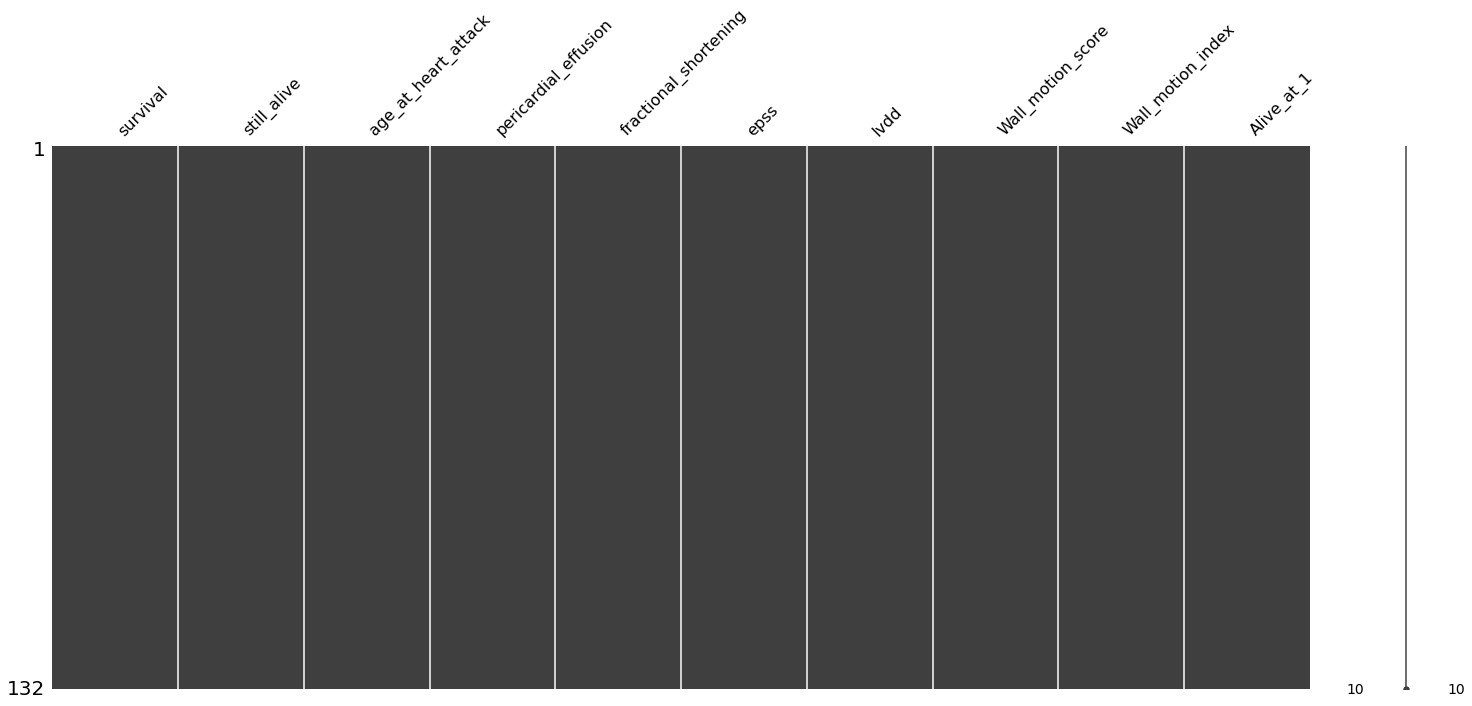

In [42]:
#show missing values
msno.matrix(dataset_knn)

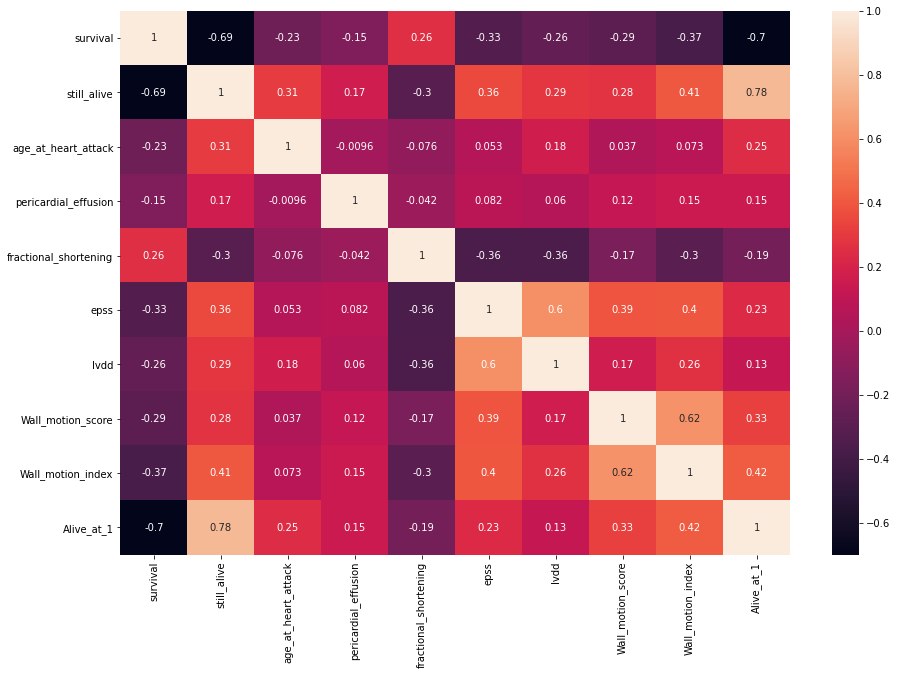

In [54]:
#graph correlation
import seaborn as sns

correlation=dataset_knn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation,annot=True)

In [56]:
#normalize data frame
column_names_to_normalize = ['survival', 'age_at_heart_attack', 'fractional_shortening', 'epss', 'lvdd', 'Wall_motion_score', 'Wall_motion_index']
dataset_knn[column_names_to_normalize] = dataset_knn[column_names_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
dataset_knn

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,Wall_motion_score,Wall_motion_index,Alive_at_1
0,0.192557,0.0,0.705882,0.0,0.416667,0.22500,0.511211,0.324324,0.0000,0.0
1,0.332982,0.0,0.725490,0.0,0.616667,0.15000,0.399103,0.324324,0.3500,0.0
2,0.280323,0.0,0.392157,0.0,0.416667,0.10000,0.246637,0.324324,0.0000,0.0
3,1.000000,0.0,0.490196,0.0,0.405000,0.30155,0.511883,0.378378,0.2250,0.0
4,0.332982,1.0,0.431373,0.0,0.250000,0.55000,0.769058,0.432432,0.6250,0.0
...,...,...,...,...,...,...,...,...,...,...
127,0.131122,1.0,0.568627,0.0,0.383333,0.32250,0.538117,0.270270,0.0000,0.0
128,0.719150,0.0,0.568627,0.0,0.450000,0.13500,0.706278,0.243243,0.0500,0.0
129,0.631385,0.0,0.666667,0.0,0.316667,0.17500,0.612108,0.337838,0.1050,0.0
130,0.385642,0.0,0.431373,0.0,0.216667,0.40250,0.457399,0.351351,0.1800,0.0


In [66]:
# class distribution
print(dataset_knn.groupby('still_alive').size())


still_alive
0.0    88
1.0    44
dtype: int64


In [0]:
dataset_knn.to_csv('echocardiogramKnnNorm.csv')
!cp echocardiogramKnnNorm.csv "/content/drive/My Drive/"

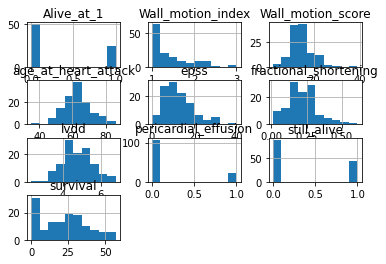

In [64]:
# histograms
dataset.hist()
pyplot.show()

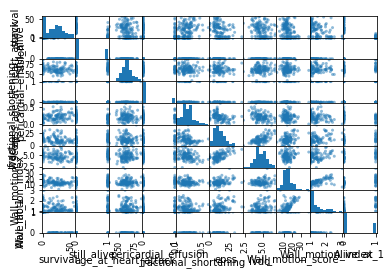

In [65]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()